In [52]:
import numpy as np
from matplotlib import pyplot as plt
import copy
from scipy import signal

<StemContainer object of 3 artists>

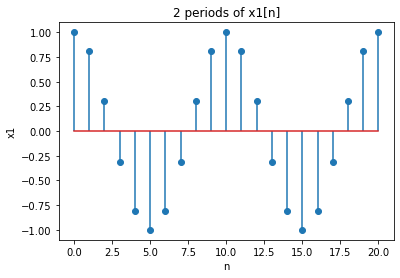

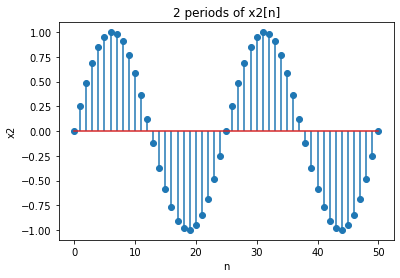

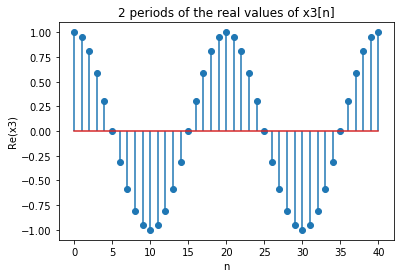

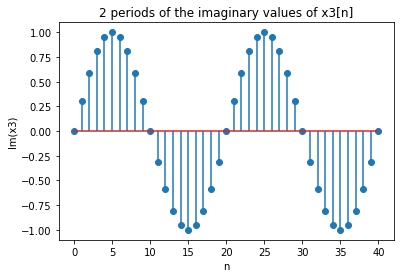

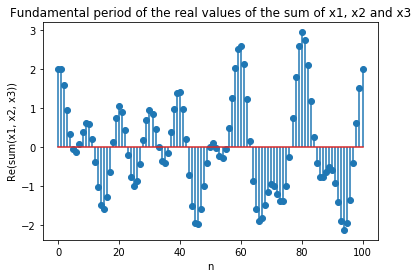

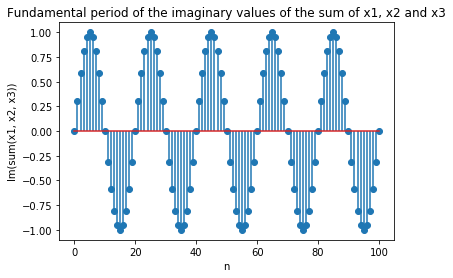

In [18]:
#A9.1

n = np.linspace(0, 200, 201)
x1 = np.cos(4*np.pi*n/20)
x2 = np.sin(6*np.pi*n/75)
x3 = np.exp(1j*2*np.pi*n/20)
x4 = x1+x2+x3

plt.figure(1)
plt.title("2 periods of x1[n]")
plt.xlabel("n")
plt.ylabel("x1")
plt.stem(n[:21], x1[:21], use_line_collection=True)

plt.figure(2)
plt.title("2 periods of x2[n]")
plt.xlabel("n")
plt.ylabel("x2")
plt.stem(n[:51], x2[:51], use_line_collection=True)

plt.figure(3)
plt.title("2 periods of the real values of x3[n]")
plt.xlabel("n")
plt.ylabel("Re(x3)")
plt.stem(n[:41], np.real(x3[:41]), use_line_collection=True)

plt.figure(4)
plt.title("2 periods of the imaginary values of x3[n]")
plt.xlabel("n")
plt.ylabel("Im(x3)")
plt.stem(n[:41], np.imag(x3[:41]), use_line_collection=True)

plt.figure(5)
plt.title("Fundamental period of the real values of the sum of x1, x2 and x3")
plt.xlabel("n")
plt.ylabel("Re(sum(x1, x2, x3))")
plt.stem(n[:101], np.real(x4[:101]), use_line_collection=True)

plt.figure(6)
plt.title("Fundamental period of the imaginary values of the sum of x1, x2 and x3")
plt.xlabel("n")
plt.ylabel("Im(sum(x1, x2, x3))")
plt.stem(n[:101], np.imag(x4[:101]), use_line_collection=True)

Tau = 0.44814201177245505


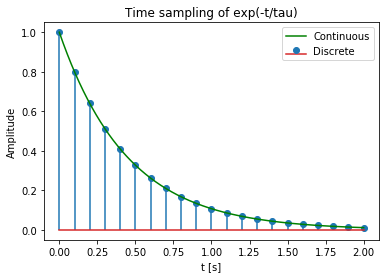

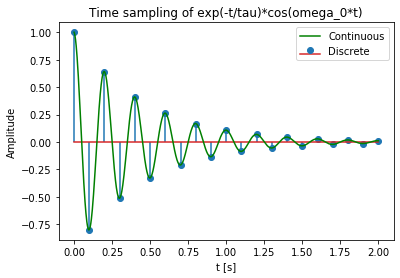

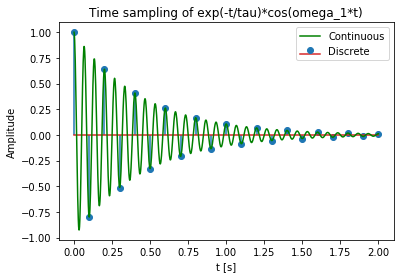

In [32]:
#A9.2.)
n = np.linspace(0, 20, 21)
f = 10
t = np.linspace(0, 2, 1000)
x1 = 0.8**n
tau = -1/(10*np.log(0.8))
print("Tau =", tau)
y1 = np.exp(-t/tau)

plt.figure(7)
plt.title("Time sampling of exp(-t/tau)")
plt.xlabel("t [s]")
plt.ylabel("Amplitude")
plt.stem(n/f, x1, use_line_collection=True, label = "Discrete")
plt.plot(t, y1, color = "g", label = "Continuous")
plt.legend()

omega0 = 2*np.pi/0.2
omega1 = 3*2*np.pi/0.2

x2 = 0.8**n*np.cos(np.pi*n)
y2 = np.exp(-t/tau)*np.cos(omega0*t)
y3 = np.exp(-t/tau)*np.cos(omega1*t)


plt.figure(8)
plt.title("Time sampling of exp(-t/tau)*cos(omega_0*t)")
plt.xlabel("t [s]")
plt.ylabel("Amplitude")
plt.stem(n/f, x2, use_line_collection=True, label = "Discrete")
plt.plot(t, y2, color = "g", label = "Continuous")
plt.legend()

plt.figure(9)
plt.title("Time sampling of exp(-t/tau)*cos(omega_1*t)")
plt.xlabel("t [s]")
plt.ylabel("Amplitude")
plt.stem(n/f, x2, use_line_collection=True, label = "Discrete")
plt.plot(t, y3, color = "g", label = "Continuous")
plt.legend()

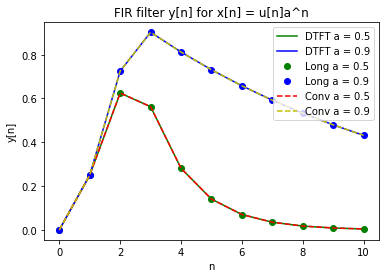

In [66]:
#A9.3.)
#From DTFT
n = np.linspace(0, 10, 11)
a1 = 0.5
y1 = 0.25*a1**(n-1)*np.heaviside(n-1, 1) + 0.5*a1**(n-2)*np.heaviside(n-2, 1) + 0.25*a1**(n-3)*np.heaviside(n-3, 1)
a2 = 0.9
y2 = 0.25*a2**(n-1)*np.heaviside(n-1, 1) + 0.5*a2**(n-2)*np.heaviside(n-2, 1) + 0.25*a2**(n-3)*np.heaviside(n-3, 1)

#From long division:
numerator = 0.25*np.array([0, 1, 2, 1])
denominator = np.array([1, -a1, 0, 0])
temp = copy.copy(num)
y = np.zeros(11)
y[0] = numerator[0]/denominator[0]
temp[0] = numerator[1] - y[0]*denominator[1]
temp[1] = numerator[2] - y[0]*denominator[2]
temp[2] = numerator[3] - y[0]*denominator[3]
temp[3] = 0
numerator = temp
y[1] = numerator[0]/denominator[0]
temp[0] = numerator[1] - y[1]*denominator[1]
temp[1] = numerator[2] - y[1]*denominator[2]
temp[2] = numerator[3] - y[1]*denominator[3]
numerator = temp
for i in range(2, 11):
    y[i] = numerator[0]/denominator[0]
    temp[0] = numerator[1] - y[i]*denominator[1]
    temp[1] = -y[i]*denominator[2]
    numerator = temp

y3 = copy.copy(y)

numerator = 0.25*np.array([0, 1, 2, 1])
denominator = np.array([1, -a2, 0, 0])
temp = copy.copy(num)
y = np.zeros(11)
y[0] = numerator[0]/denominator[0]
temp[0] = numerator[1] - y[0]*denominator[1]
temp[1] = numerator[2] - y[0]*denominator[2]
temp[2] = numerator[3] - y[0]*denominator[3]
temp[3] = 0
numerator = temp
y[1] = numerator[0]/denominator[0]
temp[0] = numerator[1] - y[1]*denominator[1]
temp[1] = numerator[2] - y[1]*denominator[2]
temp[2] = numerator[3] - y[1]*denominator[3]
numerator = temp
for i in range(2, 11):
    y[i] = numerator[0]/denominator[0]
    temp[0] = numerator[1] - y[i]*denominator[1]
    temp[1] = -y[i]*denominator[2]
    numerator = temp
    
y4 = copy.copy(y)
    
#From convolution:    
x1 = a1**n*np.heaviside(n, 1)
x2 = a2**n*np.heaviside(n, 1)
h = 0.25*np.array([0, 0, 0, 1, 2, 1])
y5 = signal.convolve(x1, h, mode = "same")
y6 = signal.convolve(x2, h, mode = "same")

plt.figure(10)
plt.title("FIR filter y[n] for x[n] = u[n]a^n")
plt.xlabel("n")
plt.ylabel("y[n]")
#plt.stem(n/f, x2, use_line_collection=True, label = "Discrete")
plt.plot(n, y1, color = "g", label = "DTFT a = 0.5")
plt.plot(n, y2, color = "b", label = "DTFT a = 0.9")
plt.plot(n, y3, 'go', label = "Long a = 0.5")
plt.plot(n, y4, 'bo', label = "Long a = 0.9")
plt.plot(n, y5, 'r--', label = "Conv a = 0.5")
plt.plot(n, y6, 'y--', label = "Conv a = 0.9")
plt.legend()

#Litt vanskelig å se ka som e ka, men alle 3 metoder gir samme resultat

In [67]:
print(y1)
#Stemmer overens med de utregnede verdiene for hånd i oppgave d

[0.         0.25       0.625      0.5625     0.28125    0.140625
 0.0703125  0.03515625 0.01757812 0.00878906 0.00439453]
